<a href="https://colab.research.google.com/github/Akash-Adak/Machine-Learning/blob/f1/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimated coefficients: b0 = -16.8243, b1 = 5.3981


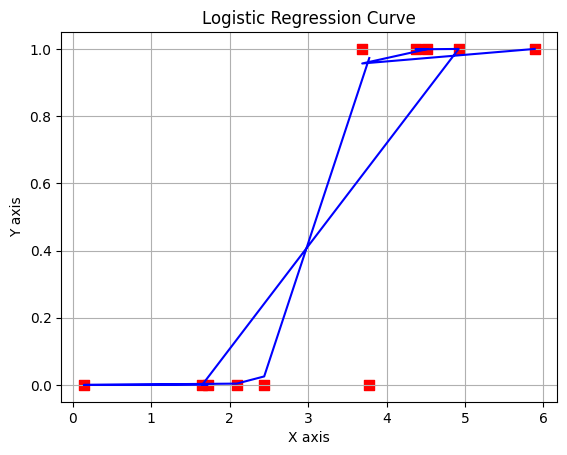

In [2]:
# Importing required libraries
import numpy as np                      # For numerical operations and array handling
import matplotlib.pyplot as plt        # For plotting the data and regression curve

# Function to compute coefficients for logistic regression using linear approximation
def coff(x, y):
    n = np.size(x)                     # Total number of data points
    mx = np.mean(x)                    # Mean of input feature values
    my = np.mean(y)                    # Mean of target labels

    # Cross-deviation and deviation about x
    ss_xy = np.sum(x * y) - n * mx * my   # Covariance between x and y
    ss_xx = np.sum(x * x) - n * mx * mx   # Variance of x

    b1 = ss_xy / ss_xx                # Slope of the regression line
    b0 = my - (b1 * mx)               # Intercept of the regression line

    return b0, b1                     # Return the coefficients

# Function to plot the logistic regression curve
def lr_plot(p, q, b):
    plt.scatter(p, q, color='r', marker="s", s=50)  # Plot original data points as red squares

    y_out = (b[0] + b[1] * p)         # Compute linear combination (z = b0 + b1*x)
    lr = 1 / (1 + np.exp(-y_out))     # Apply sigmoid function to get probabilities

    plt.plot(p, lr, color='b')        # Plot the logistic regression curve in blue
    plt.xlabel("X axis")              # Label for X-axis
    plt.ylabel("Y axis")              # Label for Y-axis
    plt.title("Logistic Regression Curve")  # Title of the plot
    plt.grid(True)                    # Add grid for better readability
    plt.show()                        # Display the plot

# Main function to run the logistic regression
def main():
    # Input feature values (reshaped to column vector)
    x = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.52, 3.69, 5.89]).reshape([-1, 1])

    # Corresponding binary labels (0 or 1)
    y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

    # Compute coefficients using the coff function
    b = coff(x, y)

    # Print the estimated coefficients
    print("Estimated coefficients: b0 = {:.4f}, b1 = {:.4f}".format(b[0], b[1]))

    # Plot the logistic regression curve
    lr_plot(x, y, b)

# Entry point of the script
if __name__ == "__main__":
    main()


In [3]:
# Import necessary libraries
import numpy as np                      # For numerical operations and array handling
import matplotlib.pyplot as plt         # For plotting (if needed)
from sklearn import linear_model as lm  # Import linear models from scikit-learn

# Define input features and reshape to column vector
x = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.52, 3.69, 5.89]).reshape([-1, 1])

# Define corresponding binary labels (0 for class A, 1 for class B)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Create a logistic regression model instance
lr = lm.LogisticRegression()

# Fit the model to the data (learn coefficients)
lr.fit(x, y)

# Predict the class for a new input value (e.g., x = 3.46)
pre = lr.predict(np.array([3.46]).reshape(-1, 1))

# Print the predicted class label (0 or 1)
print(pre)


[0]


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)

<Axes: xlabel='Age', ylabel='Insurance'>

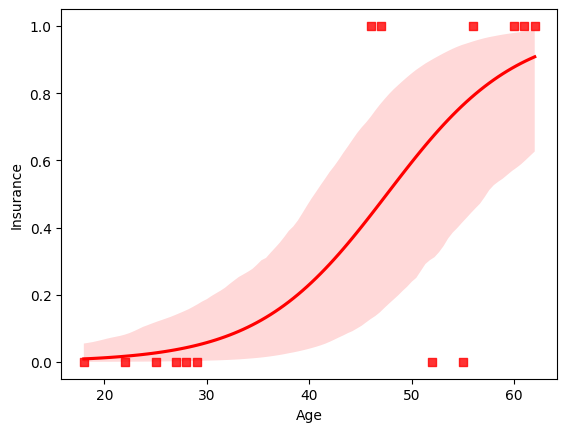

In [4]:
# Import necessary libraries
import numpy as np                      # For numerical operations and array handling
import pandas as pd                     # For creating and manipulating dataframes
import seaborn as sns                   # For statistical data visualization

# Define input feature: Age of individuals
x = np.array([22, 25, 47, 52, 46, 56, 55, 60, 62, 61, 18, 28, 27, 29])

# Define target variable: Insurance status (0 = No, 1 = Yes)
y = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

# Create a pandas DataFrame combining Age and Insurance status
df = pd.DataFrame({
    'Age': x,
    'Insurance': y
})

# Plot logistic regression using Seaborn's regplot
# - x: independent variable (Age)
# - y: dependent variable (Insurance)
# - logistic=True: fits a logistic regression curve
# - marker="s": square markers for data points
# - color="r": red color for points and curve
sns.regplot(x="Age", y="Insurance", data=df, logistic=True, marker="s", color="r")




## 📘 Logistic Regression: Manual, Scikit-learn, and Seaborn Visualization

This notebook demonstrates three different approaches to logistic regression, each offering a unique perspective on how classification models work. The goal is to understand both the **mathematical intuition** and the **practical implementation** of logistic regression.

---

### 🔧 1. Manual Logistic Regression (Linear Approximation + Sigmoid)

In this section, we manually estimate the coefficients of a logistic regression model using **least squares linear regression**. Here's what happens:

- We compute the slope (`b1`) and intercept (`b0`) using the standard formulas for linear regression.
- Then, we apply the **sigmoid function** to the linear output:  
  \[
  \{sigmoid}(z) ={1} / {1 + e^{-z}}
  \]
  This transforms the linear output into a probability between 0 and 1.
- Finally, we plot the original data points and the resulting sigmoid curve to visualize how well the model separates the two classes.

This approach is great for **building intuition** about how logistic regression works under the hood.

---

### 🤖 2. Logistic Regression Using Scikit-learn

Here, we use the `LogisticRegression` class from `sklearn.linear_model` to:

- Train a logistic regression model on a 1D feature set.
- Predict the class label for a new input value (e.g., `x = 3.46`).
- This method uses **maximum likelihood estimation** under the hood and includes regularization by default.

This is the **production-grade** approach—fast, robust, and widely used in real-world applications.

---

### 📊 3. Seaborn Logistic Regression Visualization

In this final section, we use Seaborn’s `regplot` with `logistic=True` to:

- Fit a logistic regression curve to a binary classification dataset.
- Visualize the relationship between a continuous feature (e.g., Age) and a binary outcome (e.g., Insurance status).
- The sigmoid curve shows how the probability of the positive class increases with the feature value.

This is a **quick and intuitive way** to visualize logistic regression without writing much code.

---

### ✅ Summary

| Approach         | Purpose                                 | Tools Used              |
|------------------|------------------------------------------|--------------------------|
| Manual           | Understand math + sigmoid transformation | NumPy, Matplotlib        |
| Scikit-learn     | Fast, accurate prediction                | `sklearn.linear_model`   |
| Seaborn          | Visualize logistic fit                   | Seaborn, Pandas          |

